# Imports

In [1]:
from obspy import read, Stream, Trace
from obspy.core import UTCDateTime
import numpy as np
import matplotlib.pyplot as plt
import math as M
from matplotlib import mlab
from matplotlib.colors import Normalize
import requests
from lxml import html
from scipy import signal
import matplotlib.colors as colors
import datetime
import requests
from scipy.fftpack import fft
%matplotlib inline

# Part 1

# Data 

In [2]:
ShelfRainy = 'https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/01/20/OO-HYEA2--YDH-2019-01-20T16:05:00.000015.mseed'
#Can see from Project 2 that rainy at 2019-01-20 16:09:49

ShelfWindy = 'https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/01/02/OO-HYEA2--YDH-2019-01-02T09:40:00.000015.mseed'
#Can see from Project 2 that windy at 2019-01-02 00:09:49

ShelfStormy = 'https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/01/06/OO-HYEA2--YDH-2019-01-06T19:05:00.000015.mseed'
#Can see from Project 2 that rainy & windy at 2019-01-06 19:09:49

ShelfDead = 'https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/01/22/OO-HYEA2--YDH-2019-01-22T03:05:00.000015.mseed'
#Can see from Project 2 that neither rainy nor windy at 2019-01-22 03:09:49


OffshoreRainy = 'https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/02/17/OO-HYEA1--YDH-2019-02-17T11:25:00.000000.mseed'
#Can see from Project 2 that rainy at 2019-02-17 11:29:14

OffshoreWindy = 'https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/01/01/OO-HYEA1--YDH-2019-01-01T16:20:00.000015.mseed'
#Can see from Project 2 that windy at 2019-01-01 16:29:14

OffshoreStormy = 'https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/01/04/OO-HYEA1--YDH-2019-01-04T14:25:00.000000.mseed'
#Can see from Project 2 that rainy & windy at 2019-01-04 14:29:14

OffshoreDead = 'https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/01/19/OO-HYEA1--YDH-2019-01-19T23:25:00.000015.mseed'
#Can see from Project 2 that neither rainy nor windy at 2019-01-19 23:29:14

In [3]:
SR = read(ShelfRainy)
print('SR finnished reading')
SW = read(ShelfWindy)
print('SW finnished reading')
SS = read(ShelfStormy)
print('SS finnished reading')
SD = read(ShelfDead)
print('SD finnished reading')

OR = read(OffshoreRainy)
print('OR finnished reading')
OW = read(OffshoreWindy)
print('OW finnished reading')
OS = read(OffshoreStormy)
print('OS finnished reading')
OD = read(OffshoreDead)
print('OD finnished reading')

SR finnished reading
SW finnished reading
SS finnished reading
SD finnished reading
OR finnished reading
OW finnished reading
OS finnished reading
OD finnished reading


# Stats

In [7]:
print(SR[0].stats)
print ()
print(SW[0].stats)
print()
print(SS[0].stats)
print()
print(SD[0].stats)
print()

print(OR[0].stats)
print()
print(OW[0].stats)
print()
print(OS[0].stats)
print()
print(OD[0].stats)

         network: OO
         station: HYEA2
        location: 
         channel: YDH
       starttime: 2019-01-20T16:05:00.000015Z
         endtime: 2019-01-20T16:09:59.999999Z
   sampling_rate: 64000.0
           delta: 1.5625e-05
            npts: 19200000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 10121, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 41455616})

         network: OO
         station: HYEA2
        location: 
         channel: YDH
       starttime: 2019-01-02T09:40:00.000015Z
         endtime: 2019-01-02T09:44:59.999999Z
   sampling_rate: 64000.0
           delta: 1.5625e-05
            npts: 19200000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 7162, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 29335552})

         network: OO
         station: HYEA2
        locati

In [8]:
print("Sampling Rate:")
fs1 = SR[0].stats.sampling_rate
print('SR: ',fs1)
fs2 = SW[0].stats.sampling_rate
print("SW: ",fs2)
fs3 = SS[0].stats.sampling_rate
print('SS: ',fs3)
fs4 = SD[0].stats.sampling_rate
print('SD: ',fs4)

fs5 = OR[0].stats.sampling_rate
print('OR: ',fs5)
fs6 = OW[0].stats.sampling_rate
print('OW: ',fs6)
fs7 = OS[0].stats.sampling_rate
print('OS: ',fs7)
fs8 = OD[0].stats.sampling_rate
print('OD: ',fs8)

Sampling Rate:
SR:  64000.0
SW:  64000.0
SS:  64000.0
SD:  64000.0
OR:  64000.0
OW:  64000.0
OS:  64000.0
OD:  64000.0


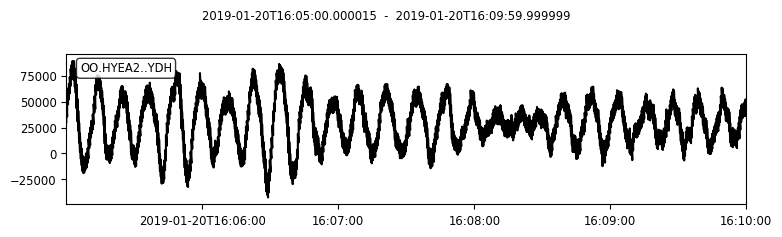

In [10]:
SR[0].plot()

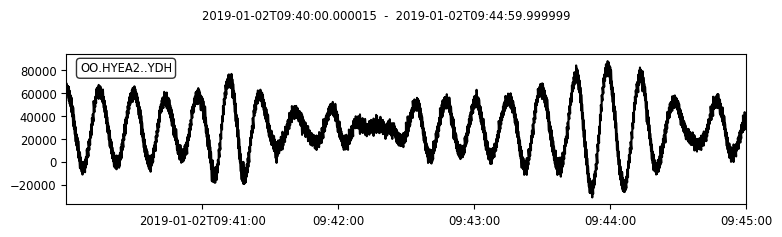

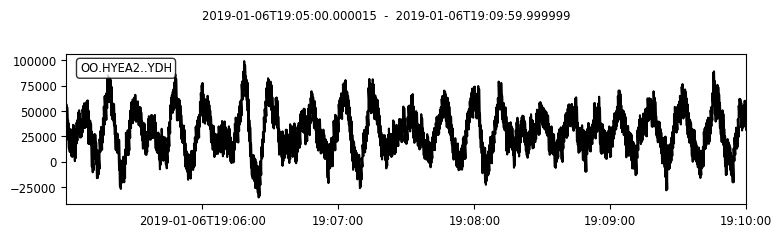

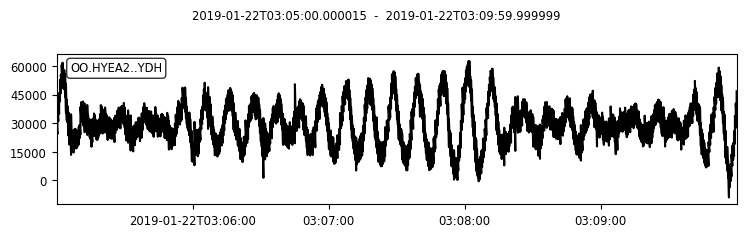

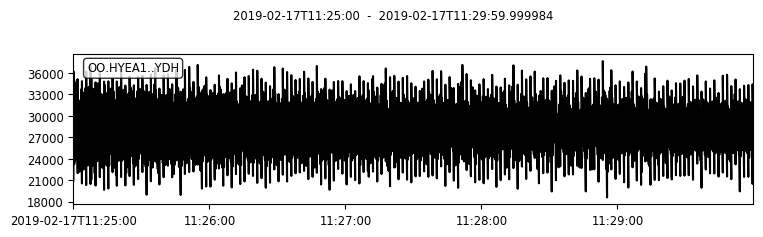

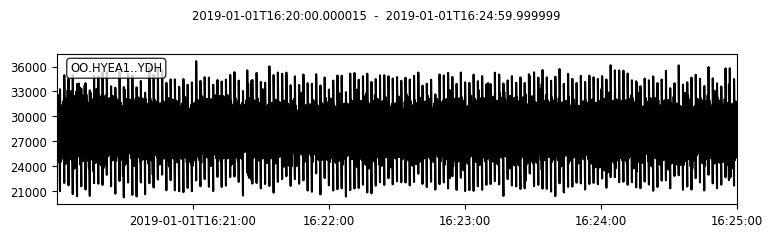

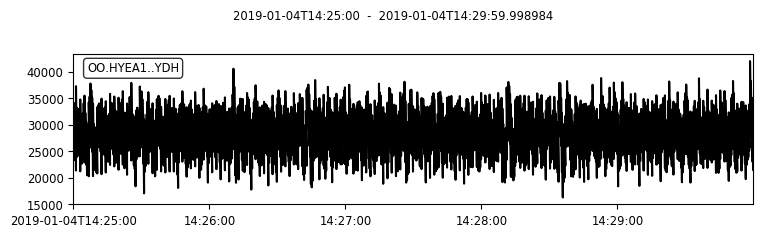

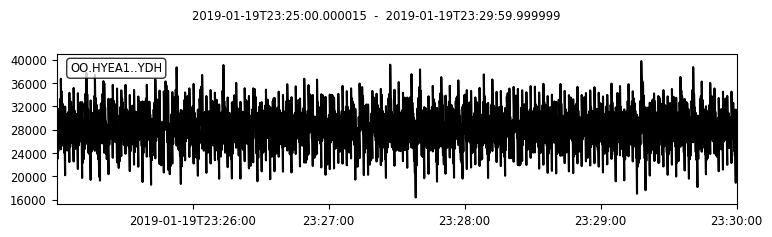

In [11]:
SW[0].plot()
SS[0].plot()
SD[0].plot()

OR[0].plot()
OW[0].plot()
OS[0].plot()
OD[0].plot()

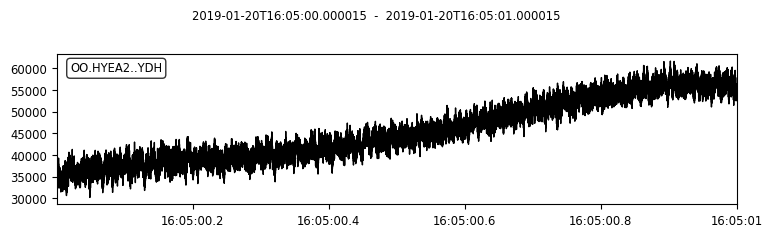

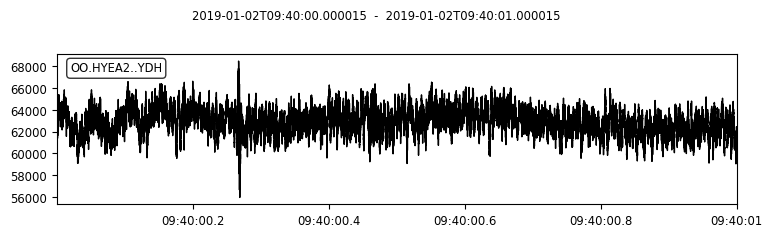

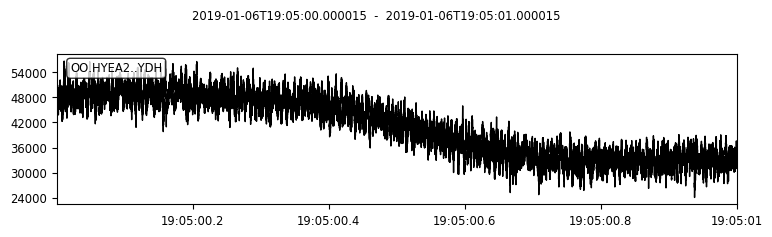

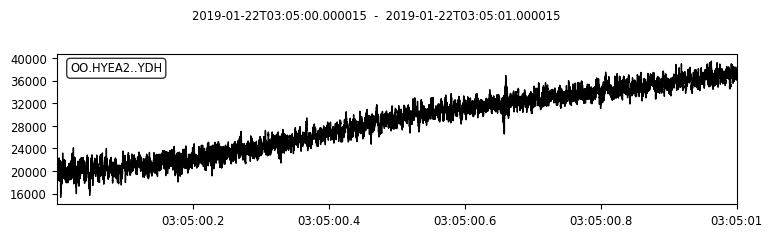

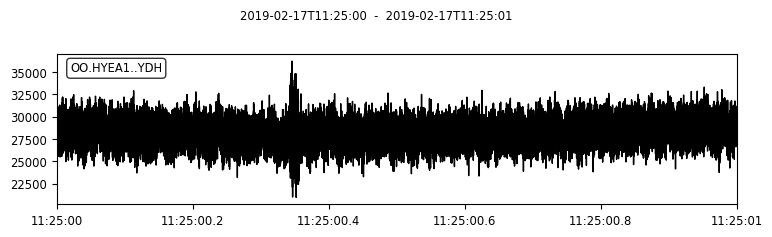

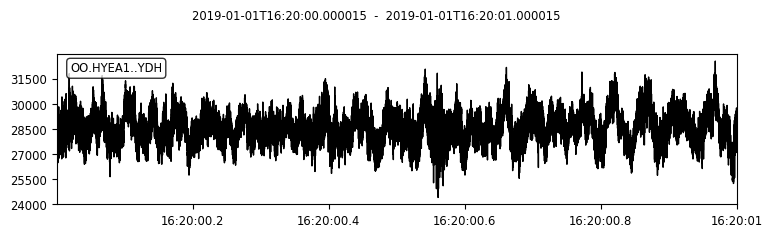

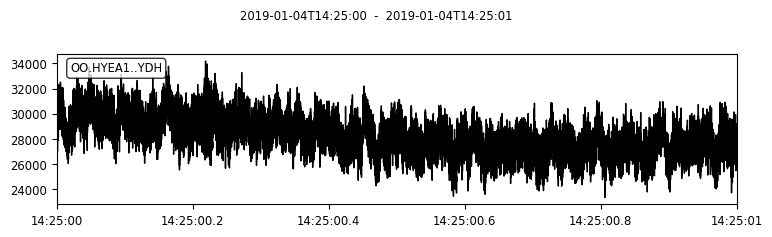

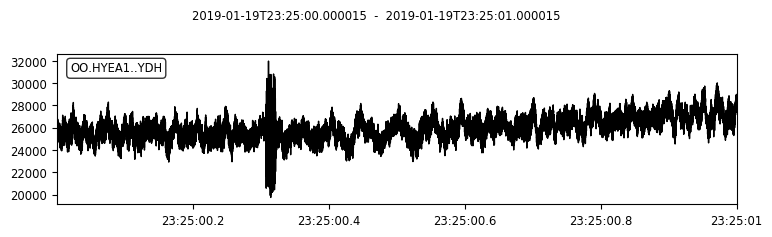

In [12]:
t_start1 = SR[0].stats.starttime 
t_end1 = SR[0].stats.starttime + 1
sliced1 = SR.slice(t_start1, t_end1)
sliced1.plot()

t_start2 = SW[0].stats.starttime 
t_end2 = SW[0].stats.starttime + 1
sliced2 = SW.slice(t_start2, t_end2)
sliced2.plot()

t_start3 = SS[0].stats.starttime 
t_end3 = SS[0].stats.starttime + 1
sliced3 = SS.slice(t_start3, t_end3)
sliced3.plot()

t_start4 = SD[0].stats.starttime 
t_end4 = SD[0].stats.starttime + 1
sliced4 = SD.slice(t_start4, t_end4)
sliced4.plot()

t_start5 = OR[0].stats.starttime 
t_end5 = OR[0].stats.starttime + 1
sliced5 = OR.slice(t_start5, t_end5)
sliced5.plot()

t_start6 = OW[0].stats.starttime 
t_end6 = OW[0].stats.starttime + 1
sliced6 = OW.slice(t_start6, t_end6)
sliced6.plot()

t_start7 = OS[0].stats.starttime 
t_end7 = OS[0].stats.starttime + 1
sliced7 = OS.slice(t_start7, t_end7)
sliced7.plot()

t_start8 = OD[0].stats.starttime 
t_end8 = OD[0].stats.starttime + 1
sliced8 = OD.slice(t_start8, t_end8)
sliced8.plot()

(0, 15000)

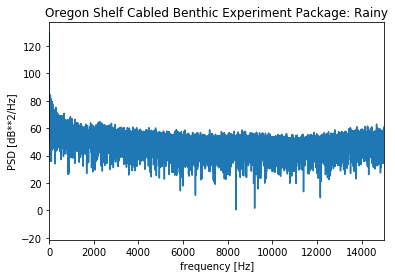

In [13]:
plt.figure(1)
x1 = (sliced1[0].data)*np.hanning(len(sliced1[0].data))
xfft1 = 2*np.square(fft(x1,64000))/(len(x1)*fs1)
fre1 = np.linspace(1,fs1,64000)
data_db1 = 10*np.log10(np.abs(xfft1))+169-128.9
plt.plot(fre1[0:32000], data_db1[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.title('Oregon Shelf Cabled Benthic Experiment Package: Rainy')
plt.xlim(0,15000)

(0, 15000)

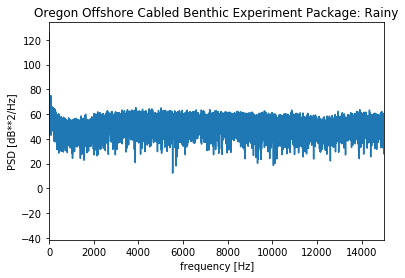

In [14]:
plt.figure(2)
x5 = (sliced5[0].data)*np.hanning(len(sliced5[0].data))
xfft5 = 2*np.square(fft(x5,64000))/(len(x5)*fs5)
fre5 = np.linspace(1,fs5,64000)
data_db5 = 10*np.log10(np.abs(xfft5))+169-128.9
plt.plot(fre5[0:32000], data_db5[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.title('Oregon Offshore Cabled Benthic Experiment Package: Rainy')
plt.xlim(0,15000)

(0, 15000)

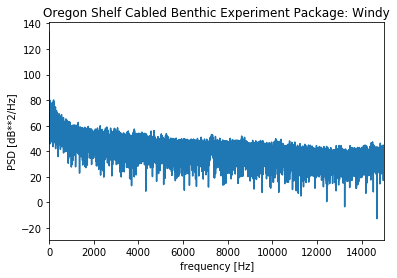

In [17]:
plt.figure(3)
x2 = (sliced2[0].data)*np.hanning(len(sliced2[0].data))
xfft2 = 2*np.square(fft(x2,64000))/(len(x2)*fs2)
fre2 = np.linspace(1,fs2,64000)
data_db2 = 10*np.log10(np.abs(xfft2))+169-128.9
plt.plot(fre2[0:32000], data_db2[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.title('Oregon Shelf Cabled Benthic Experiment Package: Windy')
plt.xlim(0,15000)

(0, 15000)

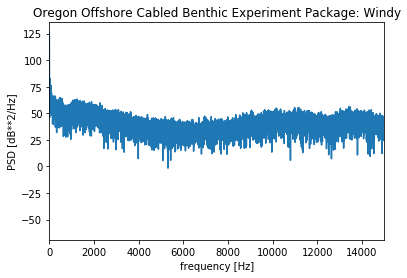

In [16]:
plt.figure(4)
x6 = (sliced6[0].data)*np.hanning(len(sliced6[0].data))
xfft6 = 2*np.square(fft(x6,64000))/(len(x6)*fs6)
fre6 = np.linspace(1,fs6,64000)
data_db6 = 10*np.log10(np.abs(xfft6))+169-128.9
plt.plot(fre6[0:32000], data_db6[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.title('Oregon Offshore Cabled Benthic Experiment Package: Windy')
plt.xlim(0,15000)

(0, 15000)

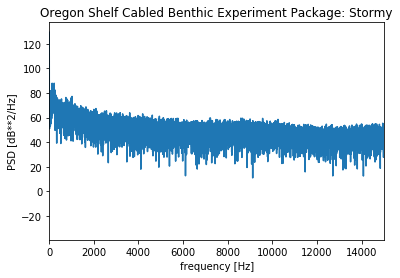

In [18]:
plt.figure(5)
x3 = (sliced3[0].data)*np.hanning(len(sliced3[0].data))
xfft3 = 2*np.square(fft(x3,64000))/(len(x3)*fs3)
fre3 = np.linspace(1,fs3,64000)
data_db3 = 10*np.log10(np.abs(xfft3))+169-128.9
plt.plot(fre3[0:32000], data_db3[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.title('Oregon Shelf Cabled Benthic Experiment Package: Stormy')
plt.xlim(0,15000)

(0, 15000)

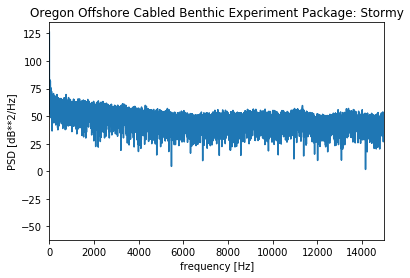

In [19]:
plt.figure(6)
x7 = (sliced7[0].data)*np.hanning(len(sliced7[0].data))
xfft7 = 2*np.square(fft(x7,64000))/(len(x7)*fs7)
fre7 = np.linspace(1,fs7,64000)
data_db7 = 10*np.log10(np.abs(xfft7))+169-128.9
plt.plot(fre7[0:32000], data_db7[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.title('Oregon Offshore Cabled Benthic Experiment Package: Stormy')
plt.xlim(0,15000)

(0, 15000)

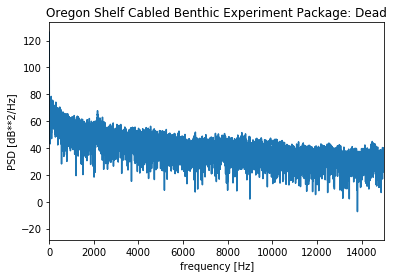

In [20]:
plt.figure(7)
x4 = (sliced4[0].data)*np.hanning(len(sliced4[0].data))
xfft4 = 2*np.square(fft(x4,64000))/(len(x4)*fs4)
fre4 = np.linspace(1,fs4,64000)
data_db4 = 10*np.log10(np.abs(xfft4))+169-128.9
plt.plot(fre4[0:32000], data_db4[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.title('Oregon Shelf Cabled Benthic Experiment Package: Dead')
plt.xlim(0,15000)

(0, 15000)

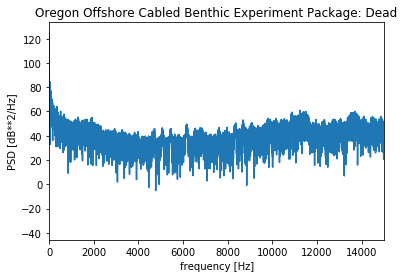

In [21]:
plt.figure(8)
x8 = (sliced8[0].data)*np.hanning(len(sliced8[0].data))
xfft8 = 2*np.square(fft(x8,64000))/(len(x8)*fs8)
fre8 = np.linspace(1,fs8,64000)
data_db8 = 10*np.log10(np.abs(xfft8))+169-128.9
plt.plot(fre8[0:32000], data_db8[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.title('Oregon Offshore Cabled Benthic Experiment Package: Dead')
plt.xlim(0,15000)

# Part 2


4000


(0, 5000)

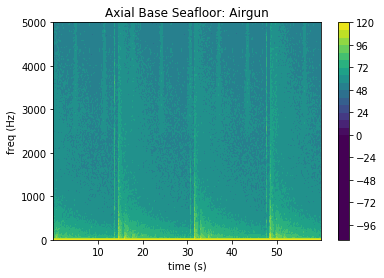

In [149]:
Airgun = 'https://rawdata.oceanobservatories.org/files/RS03AXBS/LJ03A/09-HYDBBA302/2019/08/01/OO-AXVM1--YDH-2019-08-01T00:00:00.000015.mseed'
AG = read(Airgun)
fs9 = AG[0].stats.sampling_rate


t_start9 = AG[0].stats.starttime 
t_end9 = AG[0].stats.starttime + 60
sliced9 = AG.slice(t_start9, t_end9)

npts9 = len(sliced9[0])
end = npts9 / fs9
nfft9 = int(fs9/16)  # number of fft points of each bin
print(nfft9)
per_lap = 0.90      # percentage of overlap
nlap9 = int(nfft9 * float(per_lap))   # number of overlapped samples

plt.figure(9)
# using mlab to create the array of spectrogram 
specgram, freq, time = mlab.specgram(sliced9[0].data,NFFT = nfft9,Fs = fs9,noverlap = nlap9, pad_to = None)
specgram = 10 * np.log10(specgram) +169-128.9
plt.contourf(time,freq,specgram,30,vmin=0, vmax=120)
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.title('Axial Base Seafloor: Airgun')
plt.colorbar()
plt.ylim(0,5000)

4000


(0, 5000)

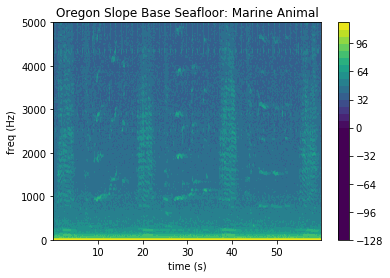

In [150]:
Marine_Animal='https://rawdata.oceanobservatories.org/files/RS01SLBS/LJ01A/09-HYDBBA102/2017/10/06/OO-HYVM1--YDH-2017-10-06T20:00:00.000015.mseed'
MA = read(Marine_Animal)
fs2 = MA[0].stats.sampling_rate


t_start2 = MA[0].stats.starttime 
t_end2 = MA[0].stats.starttime + 60
sliced2 = MA.slice(t_start2, t_end2)

npts2 = len(sliced2[0])
end = npts2 / fs2
nfft2 = int(fs2/16)  # number of fft points of each bin
print(nfft2)
per_lap = 0.90      # percentage of overlap
nlap2 = int(nfft2 * float(per_lap))   # number of overlapped samples

plt.figure(1)
# using mlab to create the array of spectrogram 
specgram, freq, time = mlab.specgram(sliced2[0].data,NFFT = nfft2,Fs = fs2,noverlap = nlap2, pad_to = None)
specgram = 10 * np.log10(specgram) +169-128.9
plt.contourf(time,freq,specgram,30,vmin=0, vmax=120)
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.colorbar()
plt.title('Oregon Slope Base Seafloor: Marine Animal')
plt.ylim(0,5000)

Finished reading Data
4000


(0, 100)

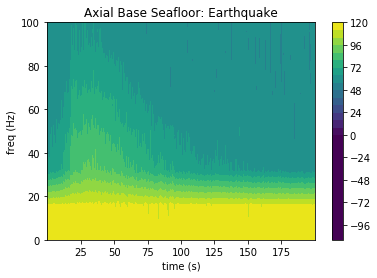

In [151]:
Earthquake='https://rawdata.oceanobservatories.org/files/RS03AXBS/LJ03A/09-HYDBBA302/2019/08/16/OO-AXVM1--YDH-2019-08-16T15:25:00.000015.mseed'
data =read(Earthquake)
print("Finished reading Data")
fs = data[0].stats.sampling_rate


t_start = data[0].stats.starttime
t_end = data[0].stats.starttime + 200
sliced = data.slice(t_start, t_end)

npts = len(sliced[0])
end = npts / fs
nfft = int(fs/16)  # number of fft points of each bin
print(nfft)
per_lap = 0.90      # percentage of overla
nlap = int(nfft * float(per_lap))   # number of overlapped samples

plt.figure(3)
# using mlab to create the array of spectrogram 
specgram, freq, time = mlab.specgram(sliced[0].data,NFFT = nfft,Fs = fs,noverlap = nlap, pad_to = None)
specgram = 10 * np.log10(specgram) +169-128.9
plt.contourf(time,freq,specgram,30,vmin=0, vmax=120)
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.colorbar()
plt.title('Axial Base Seafloor: Earthquake')
plt.ylim(0,100)